# Install package

In [1]:
# # install community
# library(devtools)

# devtools::install_github("SoloveyMaria/community")

# Calculate communication

In [2]:
# libraries
library(community)
library(data.table) #to read gz file
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday() 

In [3]:
input_dir <- "input_data/"
output_dir <- "computed_results/"

In [4]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/mami/miniconda3/envs/community/lib/libopenblasp-r0.3.26.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4      
 [5] purrr_1.0.2       readr_2.1.5       tidyr_1.3.1       tibble_3.2.1     
 [9] ggplot2_3.5.0     tidyverse_2.0.0   data.table_1.15.2 community_

## Load data

To calculate interactions, we will need the following files: normalized `counts`, cell annotation file `anno_cells`, and a sample annotation file `anno_samples`.

The `counts` file contains normalizedcounts with genes in the rows and cell IDs in the columns.

The `anno_cells` file should contain columns named cell_ID, cell_type and sample_ID.

The `anno_sample` file should contain columns named sample_ID health_status (e.g. "healthy" or "AML") and case_or_control (e.g. "control" or "case").


We have converted human genes to their mouse one-to-one orthologs. The database for mouse can be loaded as `data("LR_database_mouse")`

In [10]:
data("LR_database")

In [15]:
# data("LR_database_mouse")
# print(str(LR_database_mouse))

In [6]:
# data("LR_database")
print(str(LR_database))

'data.frame':	6941 obs. of  21 variables:
 $ True_LR              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Pair.Name            : chr  "S100A10_TRPV6" "JAG2_NOTCH1" "DLL1_NOTCH1" "IGF1_IGF1R" ...
 $ Ligand               : chr  "S100A10" "JAG2" "DLL1" "IGF1" ...
 $ Ligand.Name          : chr  "S100 calcium binding protein A10" "jagged canonical Notch ligand 2" "delta like canonical Notch ligand 1" "insulin like growth factor 1" ...
 $ Receptor             : chr  "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
 $ Receptor.Name        : chr  "transient receptor potential cation channel subfamily V member 6" "notch receptor 1" "notch receptor 1" "insulin like growth factor 1 receptor" ...
 $ complex_pair         : chr  NA NA NA NA ...
 $ source               : chr  "P60903" "Q9Y219" "O00548" "P05019" ...
 $ target               : chr  "Q9H1D0" "P46531" "P46531" "P08069" ...
 $ is_directed          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ is_stimulation       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ is_inhibit

In [7]:
# # load counts
print("load counts")
counts <- fread(paste0(input_dir,"counts_lognorm.csv.gz"), header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
print(str(counts))

[1] "load counts"
'data.frame':	15770 obs. of  46702 variables:
 $ X2020.09.15.AML0024.CATCAAGGTTAGCGGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCAAGTCCGAGAAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCCACAGGGACCAT           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGAGCAAGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGTTCCATG           : num  0 0.993 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTAGAATAC           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTTCTCCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCCGAACGC           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCTAGTCAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACAAGACAGTCG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAATTGCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAGAACTAA           : num  0 0 0 0 0 0 0 

In [8]:
# load cell annotation
print("load cell annotation")
anno_cells <- read.table(paste0(input_dir,"anno_cells_norm.txt")
                         ,sep = "\t"
                         # ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

[1] "load cell annotation"
'data.frame':	46702 obs. of  92 variables:
 $ sample_ID                    : chr  "AML-0024" "AML-0024" "AML-0024" "AML-0024" ...
 $ cell                         : chr  "2020-09-15-AML0024:CATCAAGGTTAGCGGA" "2020-09-15-AML0024:CATCAAGTCCGAGAAG" "2020-09-15-AML0024:CATCCACAGGGACCAT" "2020-09-15-AML0024:CCTCAACAGAGCAAGA" ...
 $ UMAP_1                       : num  -0.731 -2.2 -2.867 -1.666 -0.972 ...
 $ UMAP_2                       : num  -15.8 -16.7 -16.1 -16.1 -17.5 ...
 $ orig.ident                   : chr  "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" ...
 $ samples                      : chr  "AML0024" "AML0024" "AML0024" "AML0024" ...
 $ Broad_cell_identity          : chr  "CD14+ monocyte" "CD14+ monocyte" "CD16+ monocyte" "CD14+ monocyte" ...
 $ Cell_type_identity           : chr  "CD14+ IFN+" "CD14+" "CD16+" "CD14+ IFN+" ...
 $ clusters_res.2               : int  7 7 7 7 80 7 7 7 7 7 ...
 $ CNV_pos                   

In [9]:
# load sample annotation
print("load sample annotation")
anno_samples <- read.table(paste0(input_dir,"anno_samples_norm.txt")
                           ,sep = "\t"
                           # ,row.names = 1
                           ,header = TRUE
                           )
print(str(anno_samples))

[1] "load sample annotation"
'data.frame':	13 obs. of  60 variables:
 $ Sample.ID                    : chr  "U-06-0024" "U-16-0160" "U-11-0693" "U-18-1371" ...
 $ sex                          : chr  "M" "M" "F" "M" ...
 $ Age                          : int  64 74 77 78 71 57 80 26 39 50 ...
 $ Sequencing                   : chr  "CITE-seq" "CITE-seq" "CITE-seq + scTCR-seq" "CITE-seq" ...
 $ sample_ID                    : chr  "AML-0024" "AML-0160" "AML-0693" "AML-1371" ...
 $ Institution                  : chr  "OSU" "OSU" "OSU" "OSU" ...
 $ Manuscript.ID                : chr  "AML0024" "AML0160" "AML0693" "AML1371" ...
 $ Dx                           : chr  "AML" "AML" "AML" "AML" ...
 $ DxELN_Cytogenetic            : chr  "Adverse" "Adverse" "Adverse" NA ...
 $ Cytogenetics                 : chr  "48,XY,+8,+8,i(8)(p10),t(9;15)(q33;q15),del(10)(q22.1q24),del(13)(q14q21)" "46,XY[30]" "74-89<4n>,XXXX,-8,-9,-9,-12,-17,i(17)(q10),+mar1,+mar2,+dmin[cp18]/46,XX[2] .ish dmin(amp CMYC)" "46,X

The ligand-receptor pair database is provided by the algorithm, but the user can also use a custom database. In this case, the custom database should have the columns named 'Ligand', 'Receptor' and 'Pair.Name'. 

In [10]:
colnames(counts) <- anno_cells$cell_ID
rownames(anno_cells) <- anno_cells$cell_ID

## Thresholds

When calculating the interactions, it is possible to set three threshold: 
- `threshold_celltype_size` is a threshold for the minimum number of cells that a cell type should contain (in one sample). If the number of cells in the cell type of interest in a particular sample is less or equal to the `threshold_celltype_size`, then we consider this cell type as missing in this sample. This threshold affects the relative cell type abundance parameter (rho). The default value for the `threshold_celltype_size` is 4. 
- `threshold_nr_active_cells` is a threshold for the minimum number of active cells in a cell type (in the sample of interest). A cell is considered as active (for a specific gene), if it is expressing this gene above the `threshold_expr`. If the number of active cells (for a specific gene) in a cell type is smaller or equal to the `threshold_nr_active_cells`, i.e. does not pass the threshold, then it is set to zero (in this sample). This threshold affects the relative active fraction (phi) parameter. The default value for the `threshold_nr_active_cells` is zero.
- `threshold_expr` is a threshold for an expression value of a gene in a cell. If an expression value af a gene in a cell is smaller or equal to the `threshold_expr` value, it will be set to zero. This threshold affects the relative active fraction (phi) and the relative mean expression (p) parameters. The default value for the `threshold_expr` is 0.05.

In [11]:
# set threshold of the cell type size
threshold_celltype_size <- 6
print("threshold_celltype_size >")
print(threshold_celltype_size)

[1] "threshold_celltype_size >"
[1] 6


In [12]:
# set threshold of the minimum number of active cells
threshold_nr_active_cells <- 6
print("threshold_nr_active_cells >")
print(threshold_nr_active_cells)

[1] "threshold_nr_active_cells >"
[1] 6


In [13]:
# set threshold of expression
threshold_expr <- 0.1
print("threshold_expr >")
print(threshold_expr)

[1] "threshold_expr >"
[1] 0.1


## Calculate interactions

In [14]:
# Renaming the cell_ID.1 column in anno_cells to "cell_ID"
colnames(anno_cells)[colnames(anno_cells) == "cell_ID.1"] <- "cell_ID"

In [15]:
print("calculate communication")
interactions = calculate_communication(counts = counts
                                       ,anno_samples = anno_samples
                                       ,anno_cells = anno_cells
                                       ,threshold_celltype_size = threshold_celltype_size
                                       ,threshold_nr_active_cells = threshold_nr_active_cells
                                       ,threshold_expr = threshold_expr
                                       ,lrp_database = LR_database
                                       )

# print(str(interactions))


[1] "calculate communication"


Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML-0160 does not contain cell type NK -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML-2123 does not contain cell type DC -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML-4340 does not contain cell type Ery -- interactions for this cell type in this sample will get zero values.”


## Calculate general statistics

The `general_stat` function calculates for each interaction several parameters that will be used for the QC, visualization and the differential communication analysis. 

Following parameters for the QC step will be stored in the `anno_interactions` list:
- mean expression of a ligand in the active fraction of the sending cell type within the control cohort (`mean_e_s_l_control`) and within the case cohort (`mean_e_s_l_case`). 
- mean  expression of a receptor in the active fraction of the receiving cell type within the control cohort (`mean_e_r_r_control`) and within the case cohort (`mean_e_r_r_case`).

Following parameters for the visualization will be stored in the `anno_interactions` list:
- log2 fold change of `rho_s` between the cases and the controls (`log2FC_rho_s`). It shows for each interaction, how the cell type abundance of the sending cell type changed in the cases compared to the controls.
- log2 fold change of `rho_r` between the cases and the controls (`log2FC_rho_r_r`). It shows for each interaction, how the cell type abundance of the receiving cell type changed in the cases compared to the controls.
- log2 fold change of `rho` between the cases and the controls (`log2FC_rho`). It shows for each interaction, how the whole `rho` parameter changed in the cases compared to the controls.
- log2 fold change of `phi_l_s` between the cases and the controls (`log2FC_phi_l_s`). It shows for each interaction, how the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `phi_r_r` between the cases and the controls (`log2FC_phi_r_r`). It shows for each interaction, how the active fraction of the receptors in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `phi` between the cases and the controls (`log2FC_phi`). It shows for each interaction, how the whole `phi` parameter changed in the cases compared to the controls.
- log2 fold change of `p_l_s` between the cases and the controls (`log2FC_p_l_s`). It shows for each interaction, how the mean expression within the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `p_r_r` between the cases and the controls (`log2FC_p_r_r`). It shows for each interaction, how the mean expression within the active fraction of the receptor in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `p` between the cases and the controls (`log2FC_p`). It shows for each interaction, how the whole `p` parameter changed in the cases compared to the controls.

Following parameter for the differential communication analysis will be stored in the `anno_interactions` list:
- log2 fold change of `weights` between the cases and the controls (`log2FC_weights`). It shows for each interaction, how the whole interaction weight changed in the cases compared to the controls.





In [16]:
print("calculate general statistics")

interactions <- general_stat(comm_result = interactions
                                   ,verbose = FALSE
)
print(str(interactions$anno_interactions))

[1] "calculate general statistics"
'data.frame':	151744 obs. of  19 variables:
 $ interaction_ID     : chr  "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
 $ ligand_gene_name   : chr  "JAG2" "DLL1" "IGF1" "JAG1" ...
 $ receptor_gene_name : chr  "NOTCH1" "NOTCH1" "IGF1R" "NOTCH1" ...
 $ sending_cell_type  : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell_type: chr  "Mono" "Mono" "Mono" "Mono" ...
 $ mean_e_s_l_control : num  1.032 0.829 0.469 1.228 1.441 ...
 $ mean_e_s_l_case    : num  0.786 0.485 0.188 1.091 1.112 ...
 $ mean_e_r_r_control : num  1.23 1.23 1.23 1.23 1.01 ...
 $ mean_e_r_r_case    : num  0.988 0.988 0.736 0.988 0.893 ...
 $ log2FC_rho_s       : num  -0.455 -0.455 -0.455 -0.455 -0.455 ...
 $ log2FC_rho_r       : num  -0.455 -0.455 -0.455 -0.455 -0.455 ...
 $ log2FC_rho         : num  0.145 0.145 0.145 0.145 0.145 ...
 $ log2FC_phi_s_l     : num  4.1 -2.14 0 1.01 1.1 ...
 $ log2FC_phi_r_r     : num  0.234 0.234 0

# QC

For the quality check, we use three filters: the **interaction weight filter**, the **presence per cohort filter** and the **ligand/receptor expression filter**. An interaction is considered of good quality, if it passes all three filters.

The **interaction weight filter** checks the log10 cumulative weight of the interaction. To pass this filter, the interaction needs to be greater than the `threshold_log10_cum_weight` threshold.

In [17]:
threshold_log10_cum_weight <-  0.01
print("threshold_log10_cum_weight >")
print(threshold_log10_cum_weight)

[1] "threshold_log10_cum_weight >"
[1] 0.01


The **presence per cohort filter** checks the fraction of samples in which an interaction was detected (i.e. has a non-zero value) in the control cohort and in the case cohort. To pass this filter, an interaction needs to have a greater value than the `threshold_frac_samples_per_condition` threshold either in the control cohort or in the case cohort or in both.

In [18]:
threshold_frac_samples_per_condition <-  0.6
print("threshold_frac_samples_per_condition >")
print(threshold_frac_samples_per_condition)

[1] "threshold_frac_samples_per_condition >"
[1] 0.6


The **ligand/receptor expression filter** checks the mean expression level of the ligand and the receptor of an interaction in the case and the control samples (separately). This filter uses a `threshold_log10meanexpr_per_condition` threshold.
For each interaction four values are checked:
- log10 mean expression of the ligand in sending cells in control samples
- log10 mean expression of the receptor in receiving cells in control samples
- log10 mean expression of the ligand in sending cells in case samples
- log10 mean expression of the receptor in receiving cells in case samples.


An interaction passes this filter if both its ligand and receptor pass the threshold either in control samples or in case samples or in both.

In [19]:
threshold_log10_meanexpr_per_condition <- 0.02
print("threshold_log10_meanexpr_per_condition >")
print(threshold_log10_meanexpr_per_condition)

[1] "threshold_log10_meanexpr_per_condition >"
[1] 0.02


A good quality interaction should pass all filters.

The `filter_interactions` function produces one plot for the **interaction weight filter**, two plots for the **presence per cohort filter** (one for the controls and one for the cases) and two plots for the **ligand/receptor expression filter** (one for the controls and one for the cases). It writes the selected threshold values in the `thresholds` list of the interaction object and stores the filtering results as boolean vectors (one per threshold) in the `anno_interactions` list. The function does not subset the data, so if you want to change the filtering parameters, you can re-define the thresholds and re-run the `filter_interactions` function.

[1] "filter weak interactions"


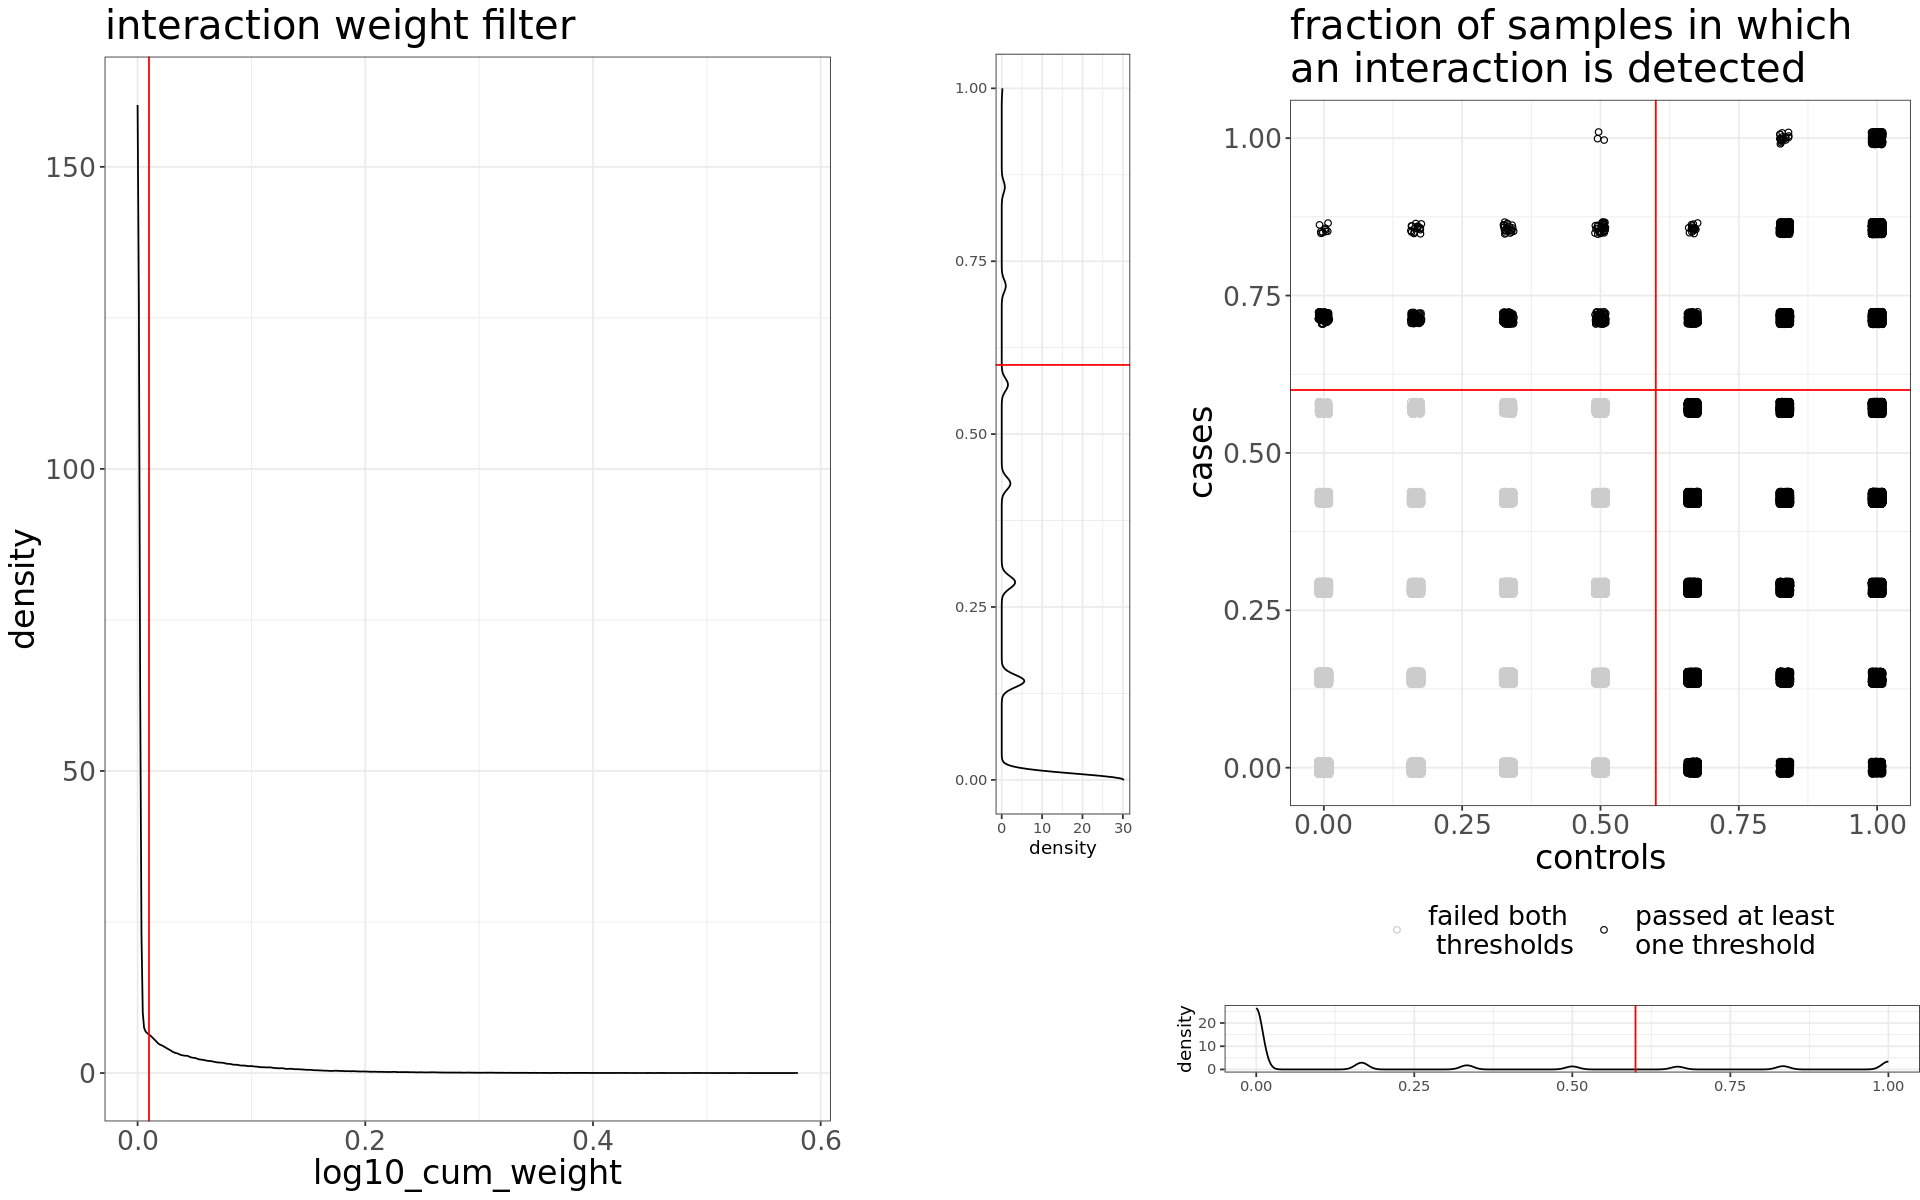

[1] "129099 out of 151744 interactions do not pass the thresholds for log10 cumulative interactions weight > 0.01 and fraction of expressing samples > 0.6 . Also  11117  interactions didn't pass the discrepancy filter.  In total, 129099  bad quality interactions will be removed and 22645 good quality interactions will remain."


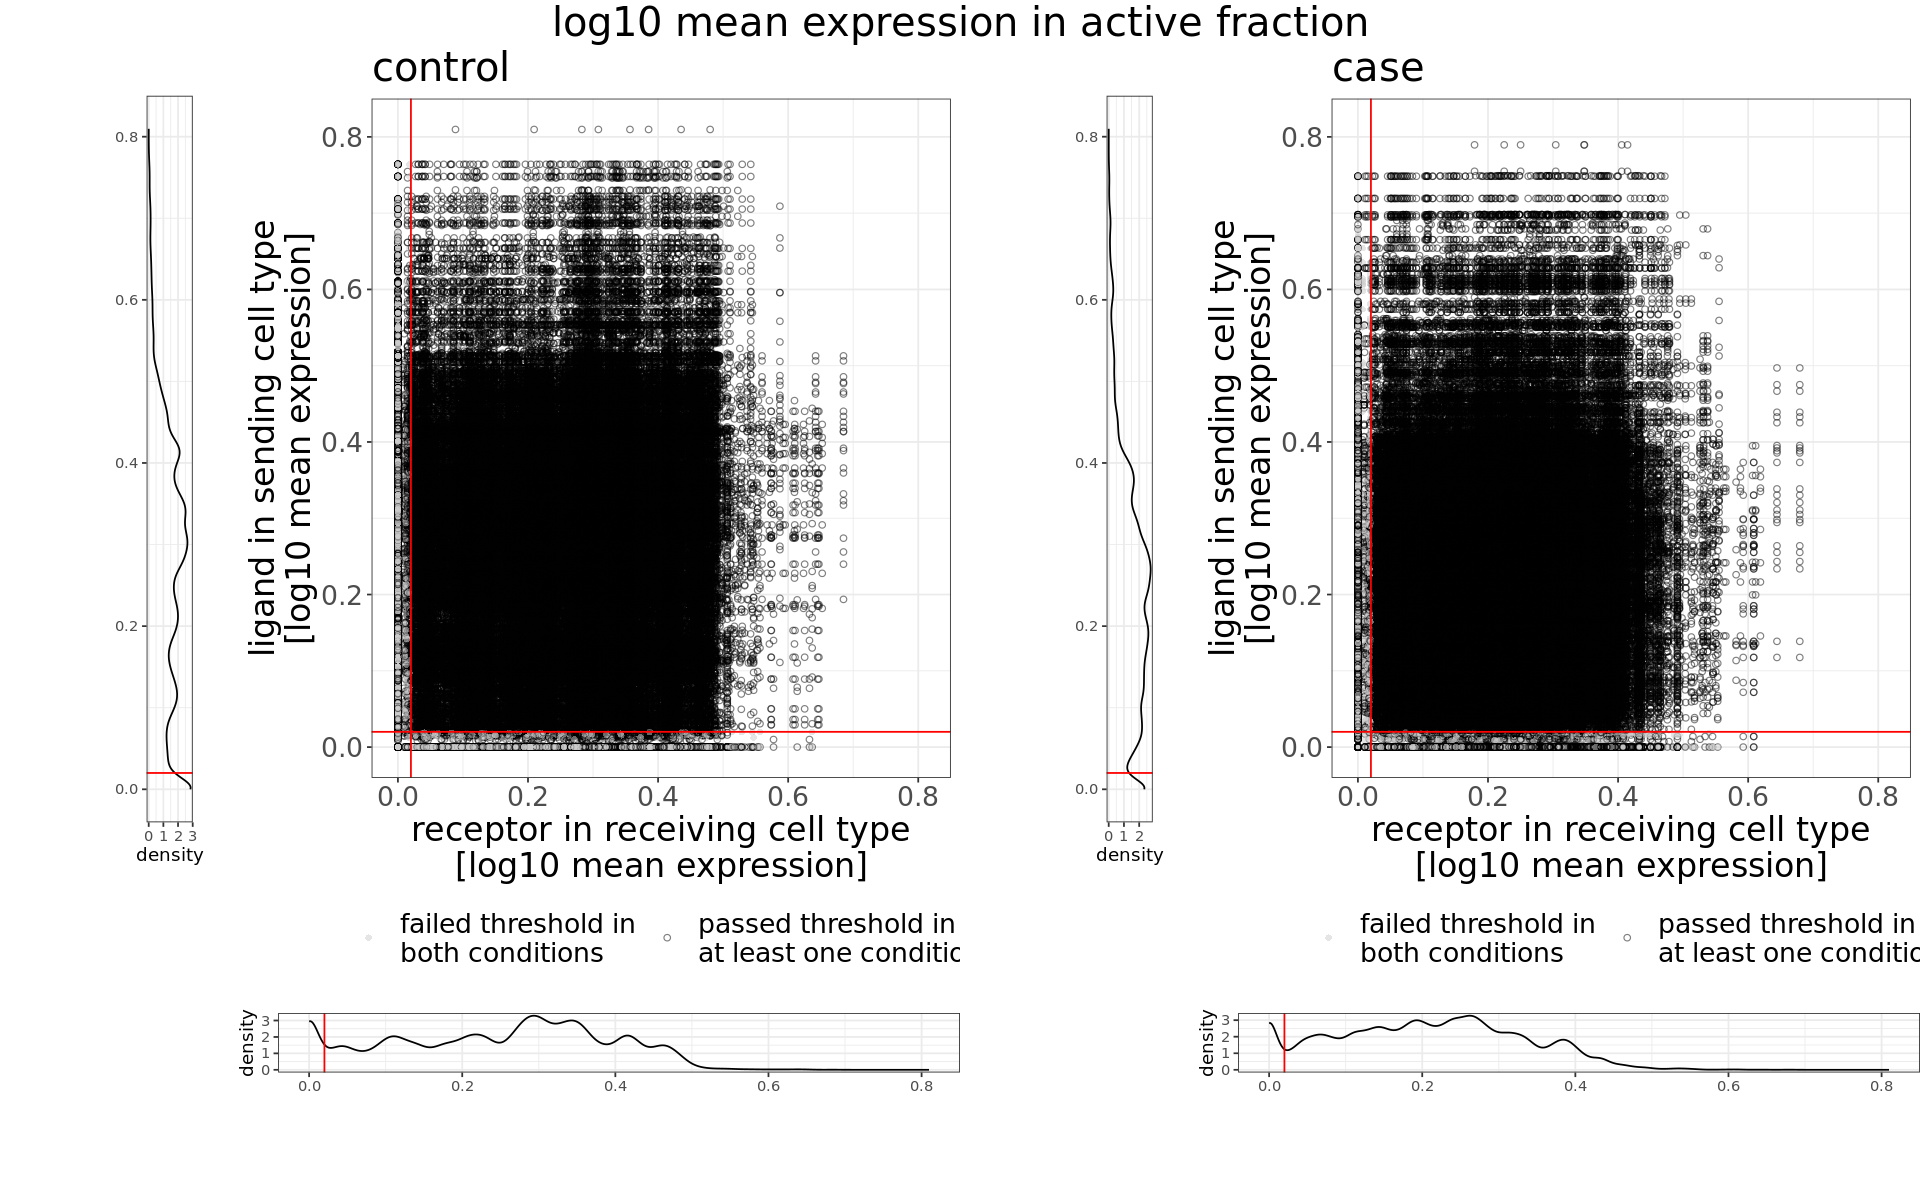

In [20]:
print("filter weak interactions")

options(repr.plot.height = 10
       ,repr.plot.width = 16)
interactions <- filter_interactions(comm_result = interactions
                             ,threshold_frac_samples_per_condition = threshold_frac_samples_per_condition
                             ,threshold_log10_cum_weight = threshold_log10_cum_weight
                             ,threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition
)

In [21]:
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

List of 6
 $ threshold_expr                        : num 0.1
 $ threshold_nr_active_cells             : num 6
 $ threshold_celltype_size               : num 6
 $ threshold_log10_cum_weight            : num 0.01
 $ threshold_frac_samples_per_condition  : num 0.6
 $ threshold_log10_meanexpr_per_condition: num 0.02
NULL
'data.frame':	151744 obs. of  28 variables:
 $ interaction_ID                            : chr  "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
 $ ligand_gene_name                          : chr  "JAG2" "DLL1" "IGF1" "JAG1" ...
 $ receptor_gene_name                        : chr  "NOTCH1" "NOTCH1" "IGF1R" "NOTCH1" ...
 $ sending_cell_type                         : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell_type                       : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ mean_e_s_l_control                        : num  1.032 0.829 0.469 1.228 1.441 ...
 $ mean_e_s_l_case                           : num  0.786

# Differential Communication

For calculating statistically significant differential interactions between the cases and the controls, we need to define an adjusted p-value threshold and the log2 fold change threshold. 

In [22]:
# Set up log2 fold change threshold. The default value is 1
threshold_log2FC <- 1
print(paste("[absolute] threshold_log2FC >",threshold_log2FC))

[1] "[absolute] threshold_log2FC > 1"


In [23]:
# Set up FDR threshold. The default value is 0.1
threshold_fdr <- 0.1
print(paste("threshold_fdr <",threshold_fdr))

[1] "threshold_fdr < 0.1"


The `test_diff` function stores the thresholds in the `thresholds` list of the interactions object.

The `test_diff` function calculates a p-value for each interaction using a Wilcoxon or t-test and adjusts for multiple testing using the FDR correction method. After that, the function checks whether the log2 fold change and the adjusted p-value thresholds were passed. An interaction is considered significant if it passes both thresholds. The `test_diff` function stores the results as a boolean vector to the `anno_interactions` list of the interactions object.



In [24]:
print("calculate differential communication")
interactions <- test_diff(comm_result = interactions
                          ,threshold_fdr = threshold_fdr
                          ,which_test = "t-test"
                          ,threshold_log2FC = threshold_log2FC
                          
                         )
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

[1] "calculate differential communication"
[1] "We have 2664 significantly differential interactions"
List of 8
 $ threshold_expr                        : num 0.1
 $ threshold_nr_active_cells             : num 6
 $ threshold_celltype_size               : num 6
 $ threshold_log10_cum_weight            : num 0.01
 $ threshold_frac_samples_per_condition  : num 0.6
 $ threshold_log10_meanexpr_per_condition: num 0.02
 $ threshold_fdr                         : num 0.1
 $ threshold_log2FC                      : num 1
NULL
'data.frame':	151744 obs. of  33 variables:
 $ interaction_ID                            : chr  "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
 $ ligand_gene_name                          : chr  "JAG2" "DLL1" "IGF1" "JAG1" ...
 $ receptor_gene_name                        : chr  "NOTCH1" "NOTCH1" "IGF1R" "NOTCH1" ...
 $ sending_cell_type                         : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell_type   

# Interplay of individual components

<img src="../components_scheme.png">

We defined six components that influence the behavior of each interaction:
- rho_s
- phi_s_l
- p_s_l
- rho_r
- phi_r_r
- p_r_r

Each of these components can be changing independently in different directions. Based on the log2FC of each of them, we will define their direction:

**Direction of the log2FC per component**:
- *log2FC_rho_s_direction
- *log2FC_phi_s_l_direction
- *log2FC_p_s_l_direction
- *log2FC_rho_r_direction
- *log2FC_phi_r_r_direction
- *log2FC_p_r_r_direction -- can have values:
    - 0 -- if the absolute log2FC is less than the threshold_log2FC_component, i.e. unchanged
    - 1 -- if the log2FC is greater than the threshold_log2FC_component, i.e. upregulated
    - -1 -- if the log2FC is less than minus threshold_log2FC_component, i.e. downregulated

Depending on how they interplay, we will split them into groups showing different characteristics.

First, it is important for us to know whether the components of only one of the two interacting partners are affected (either the sender or the receiver), or of both of them. To know this, we will calculate how many components were affected for each interacting partners:

**List of affected components per interacting partner**
- *components_affected_s* -- (sender) can have values:
- *components_affected_r* -- (receiver) can have values:
    - none
    - p
    - phi
    - rho
    - phi_p
    - rho_p
    - rho_phi
    - rho_phi_p

**Number of components affected per interacting partner**:
- *nr_comp_affected_s* -- (sender) can have values: 
    - 0, 1, 2, or 3
- *nr_comp_affected_r* -- (receiver) can have values: 
    - 0, 1, 2, or 3
- *nr_comp_affected_b* -- (both) can have values: 
    - 0, 1, 2, 3, 4, 5, or 6
    
**Which counterpart is affected**:
- *sender_or_receiver_affected* can have values:
    - none -- if nr component sender is = 0 and nr component receiver is = 0
    - sender -- if nr component sender is > 0 and nr component receiver is = 0
    - receiver -- if nr component sender is = 0 and nr component receiver is > 0
    - both -- if nr component sender is > 0 and nr component receiver is > 0
    
**Direction of the affected components per interacting partner**
- *direction_s* -- (sender) can have values:
- *direction_r* -- (receiver) can have values:
- *direction_b* -- (both) can have values:
    - none -- if zero components affected
    - up -- if >0 components affected in the same direction (upregulated)
    - down -- if >0 components affected in the same direction (downregulated)
    - both -- if >1 components affected in the opposite direction
    
If several components are affected, it is important to see, if the direction of the change is the same, such that the overall change is concordant, or it is opposite, such that the overall change is discordant.

**Concordance of direction of affected components per interacting partner**
- *concordance_s* -- (sender) can have values:
- *concordance_r* -- (receiver) can have values:
    - undefined -- if zero or one component is affected, i.e. not enough components to talk about concordance
    - concordant -- if several components are affected in the same direction
    - discordant -- if several components are affected in opposite directions
- *concordance_b* -- (both) can have values:
    - undefined -- if zero or one component is affected, i.e. not enough components to talk about concordance
    - concordant -- if several components are affected in the same direction
    - discordant -- if:
         - both concordance_s and concordance_r have one component changed each, but their direction is opposite
         - both concordance_s and concordance_r have several components changed each are both concordant, but their direction is opposite
         - either concordance_s or concordance_r is discordant while the other one is concordant
         - both concordance_s and concordance_r are discordant

**Interaction category**
 - *no_change* -- if log2FC of the interaction weight is did not pass the threshold_log2FC and none of the components is affected
    
 - *simple_decrease* -- if log2FC of the interaction weight is less than minus threshold_log2FC and only one of the components is affected and is downregulated
     
 - *simple_increase* -- if log2FC of the interaction weight is greater than the threshold_log2FC and only one of the components is affected and is upregulated
     
 - *concordant_decrease* -- if log2FC of the interaction weight is less than minus threshold_log2FC, several components are affected and all of them are downregulated
    
 - *concordant_increase* -- if log2FC of the interaction weight is greater than the threshold_log2FC, several components are affected and all of them are upregulated
    
 - *insufficient_compensation* -- if log2FC of the interaction weight is passed the threshold_log2FC in either direction and several components are affected disconcordantly
    
 - *sufficient_compensation* -- if log2FC of the interaction weight is did not pass the threshold_log2FC and several components are affected disconcordantly


In [25]:
# calculate interactions of the individual components
interactions <- interaction_classes(interactions
                   ,threshold = threshold_log2FC)
print(str(interactions$anno_interactions))

'data.frame':	151744 obs. of  52 variables:
 $ interaction_ID                            : chr  "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
 $ ligand_gene_name                          : chr  "JAG2" "DLL1" "IGF1" "JAG1" ...
 $ receptor_gene_name                        : chr  "NOTCH1" "NOTCH1" "IGF1R" "NOTCH1" ...
 $ sending_cell_type                         : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell_type                       : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ mean_e_s_l_control                        : num  1.032 0.829 0.469 1.228 1.441 ...
 $ mean_e_s_l_case                           : num  0.786 0.485 0.188 1.091 1.112 ...
 $ mean_e_r_r_control                        : num  1.23 1.23 1.23 1.23 1.01 ...
 $ mean_e_r_r_case                           : num  0.988 0.988 0.736 0.988 0.893 ...
 $ log2FC_rho_s                              : num  -0.455 -0.455 -0.455 -0.455 -0.455 ...
 $ log2FC_rho_r                 

In [26]:
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'computed_results' already exists”


In [27]:
write.csv(interactions$weights,paste0(output_dir,"community_weights.csv"))

In [28]:
write.csv(interactions$anno_interactions,paste0(output_dir,"community_anno_interactions.csv"))

In [29]:
print("save interactions.RData")
save(interactions, file = paste0(output_dir,"interactions.RData"))

[1] "save interactions.RData"
